In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn==1.2.2


# This is to disable annoying warning messages from sklearn 1.2.2
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Assignment 5
## Ziad Arafat

### Reading in the data

1. We read in the CSV using the pandas library and store it in a dataframe. 
2. We print the data in the first two rows using the `head()` method

In [3]:
df_google_reviews = pd.read_csv("google_review_ratings.csv")
print(df_google_reviews.head(n=5))

     User   C1   C2    C3    C4   C5    C6   C7    C8    C9  ...   C15   C16  \
0  User 1  0.0  0.0  3.63  3.65  5.0  2.92  5.0  2.35  2.33  ...  1.74  0.59   
1  User 2  0.0  0.0  3.63  3.65  5.0  2.92  5.0  2.64  2.33  ...  1.74  0.59   
2  User 3  0.0  0.0  3.63  3.63  5.0  2.92  5.0  2.64  2.33  ...  1.74  0.59   
3  User 4  0.0  0.5  3.63  3.63  5.0  2.92  5.0  2.35  2.33  ...  1.74  0.59   
4  User 5  0.0  0.0  3.63  3.63  5.0  2.92  5.0  2.64  2.33  ...  1.74  0.59   

   C17  C18  C19  C20  C21  C22  C23  C24  
0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  
1  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  
2  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  
3  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  
4  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  

[5 rows x 25 columns]


### Preprocessing
#### Scaling
1. We use minmax to normalize the data

In [4]:
# Drop the 'User' column
df_google_reviews = df_google_reviews.drop('User', axis=1)
# replace NaN with 0
df_google_reviews = df_google_reviews.fillna(0)

# use sklearn.preprocessing.MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_google_reviews = scaler.fit_transform(df_google_reviews)

#### Select best k value 
1. We use sklearn metrics and kmeans to select the best k-value
2. For each k, run k-means 5 times and compute the average Silhouette coefficient across those 5 running times and clusters

In [5]:
# Use the Silhouette coefficient to select the best number of clusters (k) from [1,20]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores_kmeans = []
for k in range(2, 21):
        kmeans = KMeans(n_clusters=k, random_state=42)
        silhouettes = []
        for i in range(5):
                kmeans.fit(df_google_reviews)
                silhouettes.append(silhouette_score(df_google_reviews, kmeans.labels_))
        silhouette_scores_kmeans.append(np.mean(silhouettes))



#### Plot silhouette scores
1. We plot the scores by k-value to determine the best one
2. From the plot we can see that the best tested k value was 18
3. However we can also see that for all the values the score was much closer to 0 than to 1 indicating we have overall bad separation

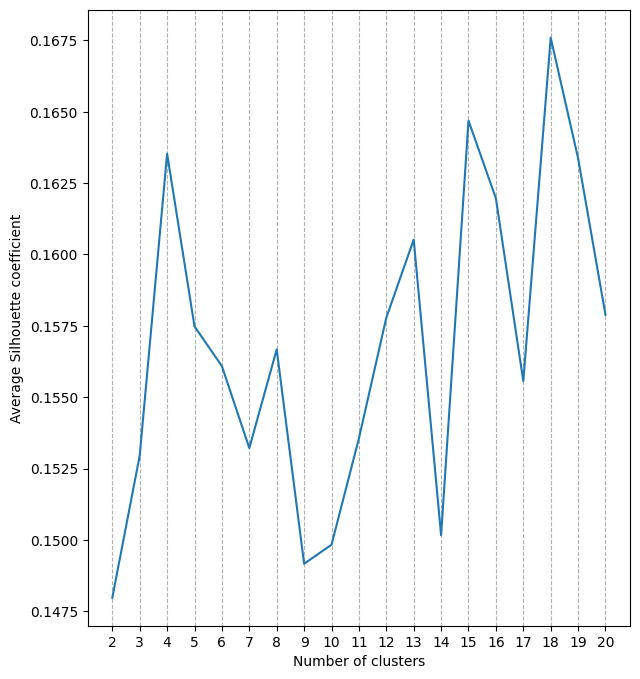

In [6]:

import matplotlib.pyplot as plt

plt.plot(range(2, 21), silhouette_scores_kmeans)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette coefficient')
plt.xticks(range(2, 21))
# make width of plot bigger
plt.gcf().set_size_inches(7, 8)
plt.grid(axis='x', linestyle='--')
plt.show()

### Training
1. Train a k-means model with the best k

In [7]:
best_k_kmeans = np.argmax(silhouette_scores_kmeans) + 2 # +2 because we started from k=2

kmeans = KMeans(n_clusters=best_k_kmeans, random_state=2)
kmeans.fit(df_google_reviews)

print(best_k_kmeans)

18


### Post analysis
#### Report Centroids
1. We print and plot the centroids to visualize how the clustering will be done

In [8]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.17342246 0.20700535 0.32517647 0.20106695 0.14585975 0.15589129
  0.99840123 0.29274846 0.44698684 0.49338251 0.56043288 0.77517297
  0.89375608 1.         0.78433155 0.14636364 0.14839572 0.17285561
  0.21997861 0.27474866 0.15372193 0.15486631 0.15331551 0.16834225]
 [0.52006122 0.50682993 0.48015646 0.27525735 0.18081563 0.11233234
  0.08417491 0.10544218 0.14331502 0.16516487 0.18237579 0.07135603
  0.04634052 0.06197857 0.51495238 0.34402721 0.27371429 0.2740068
  0.30731293 0.42576871 0.62291837 0.85783673 0.70680952 0.68278231]
 [0.24834921 0.46194709 0.70157672 0.70276477 0.76930944 0.50293114
  0.88358425 0.45063006 0.54839489 0.64740943 0.82881968 0.38003711
  0.28079853 0.19605421 0.54585185 0.44128042 0.12663492 0.10293122
  0.10273016 0.15191534 0.11568254 0.19146032 0.19713228 0.21091005]
 [0.30258947 0.38180351 0.59593684 0.91079978 0.87815156 0.6694809
  0.33714053 0.27246377 0.2698971  0.37129339 0.43054793 0.24793382
  0.12687155 0.08797584 0.24011228 0.2421614  0

#### PCA with 2 components
1. Project the data using PCA with two principal components

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_google_reviews)

##### Plot clusters using Principal Components in 2D

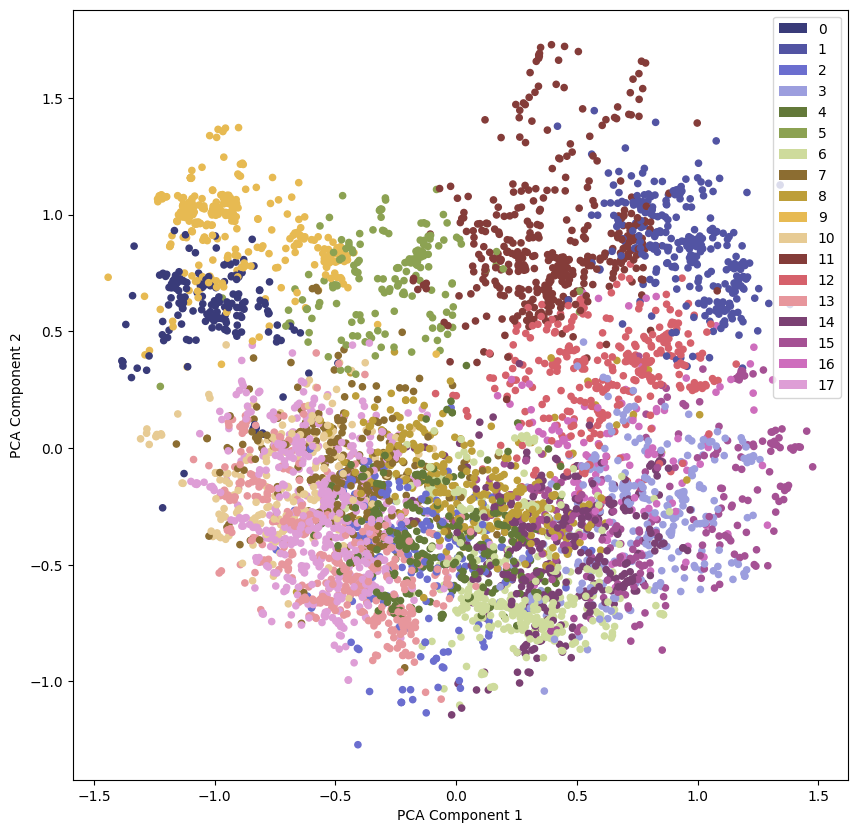

In [10]:
from matplotlib.patches import Patch

cluster_count = len(np.unique(kmeans.labels_))

# Pick a color map with sufficiently many colors for the number of clusters
cmap = plt.cm.get_cmap('tab20b', cluster_count)

plt.scatter(
        df_pca[:, 0],
        df_pca[:, 1],
        c=kmeans.labels_,
        s=20,
        alpha=1,
        cmap=cmap
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# make width of plot bigger
plt.gcf().set_size_inches(10, 10)

# add legend using cluster id as label
# Create a custom legend using Patch objects
legend_elements = [
        Patch(facecolor=cmap(i),
              label=str(i))
        for i in range(cluster_count)
]
plt.legend(handles=legend_elements)

plt.show()

### Analysis of plot
1. We can see from the plot that most of the clusters have very bad seperation. 
2. This is consistent with the very low silhouette coefficients we obtained earlier. 

## Question 2

### Training GMM

#### Recording silhouette scores

In [11]:
from sklearn.mixture import GaussianMixture


# Record silhouette scores for each k
silhouette_scores_gmm = []
for k in range(2, 21):
        silhouettes = []
        for i in range(5):
                gmm = GaussianMixture(n_components=k, random_state=2)
                gmm.fit(df_google_reviews)
                silhouettes.append(
                        silhouette_score(
                                df_google_reviews,
                                gmm.predict(df_google_reviews)
                        )
                )
        silhouette_scores_gmm.append(np.mean(silhouettes))

#### Fitting using best k

In [12]:
best_k_gmm = np.argmax(silhouette_scores_gmm) + 2 # +2 because we started from k=2

gmm = GaussianMixture(n_components=best_k_gmm, random_state=2)
gmm.fit(df_google_reviews)

print(best_k_gmm)

2


### Plotting clusters

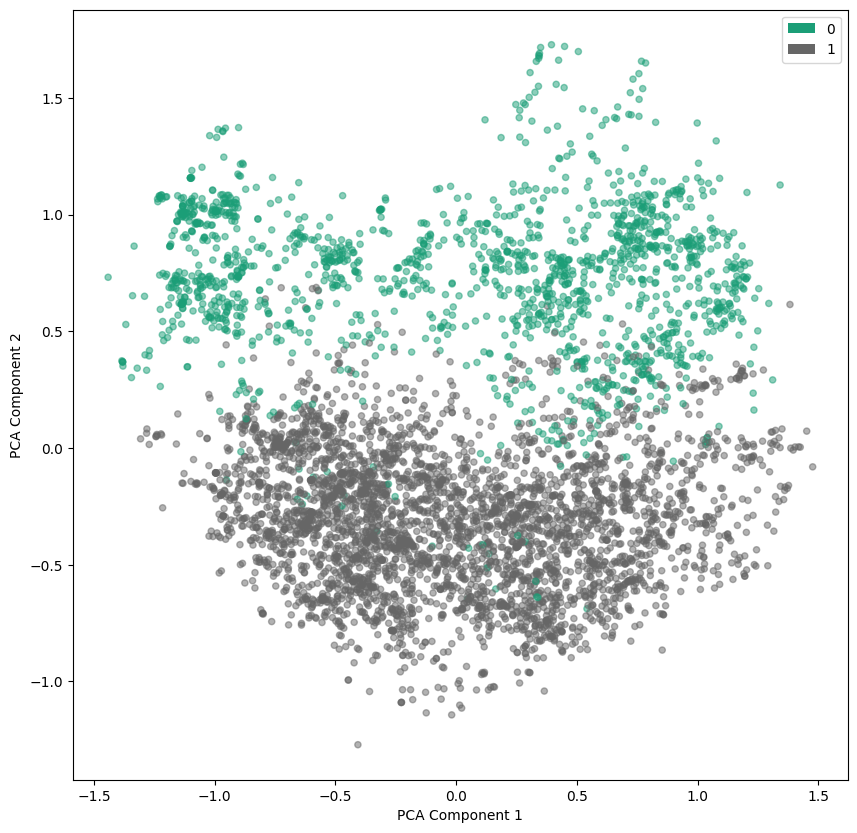

In [13]:
from matplotlib.patches import Patch 

cluster_count = len(np.unique(gmm.predict(df_google_reviews)))

# Pick a color map with sufficiently many colors for the number of clusters
cmap = plt.cm.get_cmap('Dark2', cluster_count)

plt.scatter(
        df_pca[:, 0],
        df_pca[:, 1],
        c=gmm.predict(df_google_reviews),
        s=20,
        alpha=0.5,
        cmap=cmap
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# make width of plot bigger
plt.gcf().set_size_inches(10, 10)

legend_elements = [
        Patch(facecolor=cmap(i),
              label=str(i))
        for i in range(cluster_count)
]

plt.legend(handles=legend_elements)

plt.show()

### Analysis of cluster seperation
1. Although we get really low silhouette values the clustering visually does not look so bad minus some overlap.
2. However we cannot expect 2 clusters to suffice for describing a complex dataset like this
3. Additionally it is clear that there are clusters existing that have not been defined

### Training Spectral Clustering

#### Recording silhouette scores

In [14]:
from sklearn.cluster import SpectralClustering

# repeat for SpectralClustering
silhouette_scores_spectral = []
for k in range(2, 21):
        silhouettes = []
        for i in range(5):
                spectral = SpectralClustering(n_clusters=k, random_state=2)
                spectral.fit(df_google_reviews)
                silhouettes.append(
                        silhouette_score(
                                df_google_reviews,
                                spectral.labels_
                        )
                )
        silhouette_scores_spectral.append(np.mean(silhouettes))


#### Fitting using best k


In [15]:
best_k_spectral = np.argmax(silhouette_scores_spectral) + 2 # +2 because we started from k=2

spectral = SpectralClustering(n_clusters=best_k_spectral, random_state=2)

spectral.fit(df_google_reviews)

print(best_k_spectral)

4


### Plotting spectral clusters

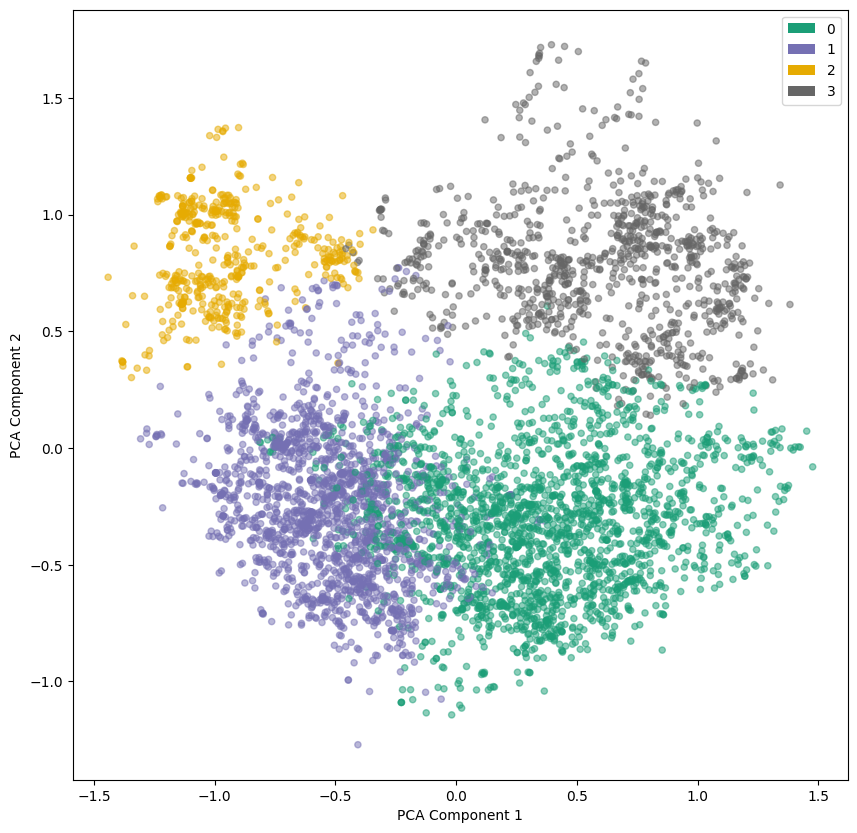

In [16]:
cluster_count = len(np.unique(spectral.labels_))

# Pick a color map with sufficiently many colors for the number of clusters
cmap = plt.cm.get_cmap('Dark2', cluster_count)

plt.scatter(
        df_pca[:, 0],
        df_pca[:, 1],
        c=spectral.labels_,
        s=20,
        alpha=0.5,
        cmap=cmap
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# make width of plot bigger
plt.gcf().set_size_inches(10, 10)

legend_elements = [
        Patch(facecolor=cmap(i),
              label=str(i))
        for i in range(cluster_count)
]

plt.legend(handles=legend_elements)

plt.show()

### Plotting all the silhouette values
1. The graph shows that although kmeans has such a low silhouette value, it is still performing better than the other two algorithms in terms of silhouette score
2. Despite this, visually it does not seem that way but this is likely because the other algorithms had much lower `best_k` values

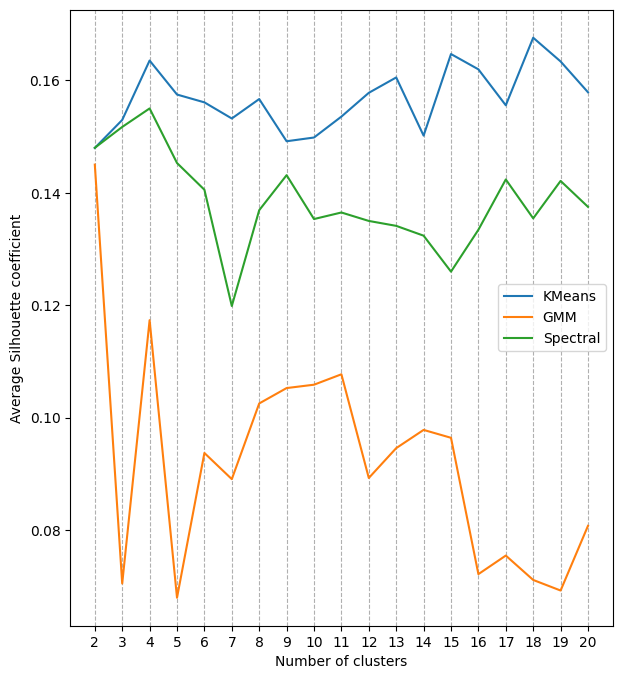

In [17]:
# plot all three silhouette scores together
plt.plot(range(2, 21), silhouette_scores_kmeans, label='KMeans')
plt.plot(range(2, 21), silhouette_scores_gmm, label='GMM')
plt.plot(range(2, 21), silhouette_scores_spectral, label='Spectral')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette coefficient')
plt.xticks(range(2, 21))
# make width of plot bigger
plt.gcf().set_size_inches(7, 8)
plt.grid(axis='x', linestyle='--')
plt.legend()
plt.show()


In [18]:
# repeat process with dbscan

from sklearn.cluster import DBSCAN

# Record silhouette scores for each k
silhouette_scores_dbscan = []

for eps in np.arange(0.1, 1.1, 0.1):
        silhouettes = []
        for i in range(5):
                dbscan = DBSCAN(eps=eps)
                dbscan.fit(df_google_reviews)
                silhouettes.append(
                        silhouette_score(
                                df_google_reviews,
                                dbscan.labels_
                        )
                )
        silhouette_scores_dbscan.append(np.mean(silhouettes))



In [19]:
eps_values = [i for i in np.arange(0.1, 1.1, 0.1)]
best_k_dbscan = eps_values[np.argmax(silhouette_scores_dbscan)]

#fit the model with the best eps value
dbscan = DBSCAN(eps=best_k_dbscan, metric='euclidean', min_samples=320)
dbscan.fit(df_google_reviews)

print(best_k_dbscan)

1.0


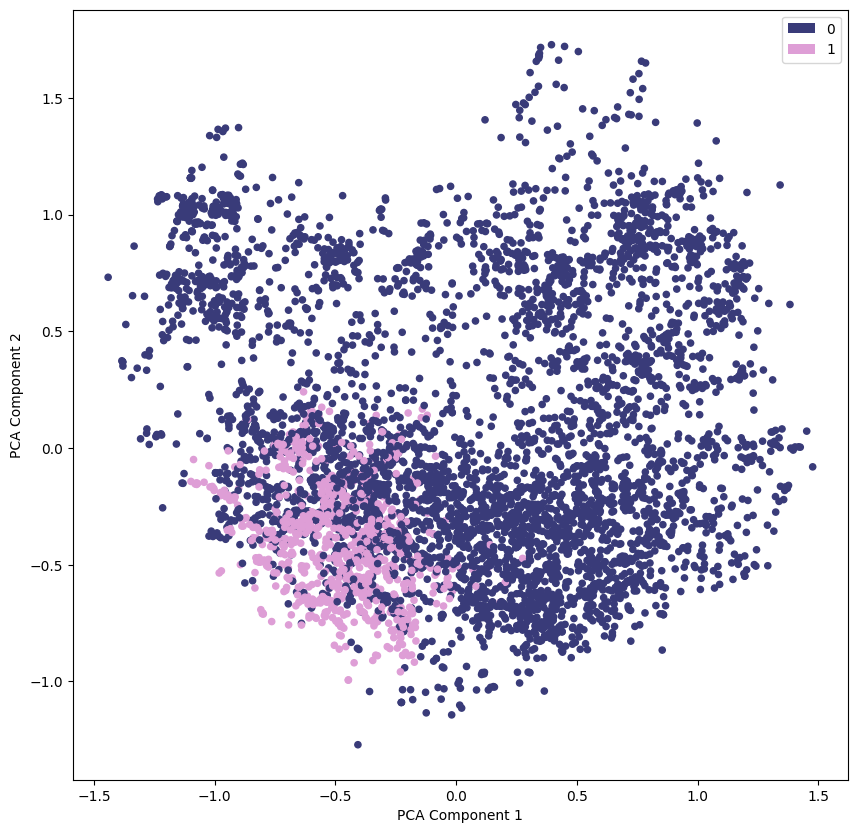

In [20]:
# plot the clusters
cluster_count = len(np.unique(dbscan.labels_))

# Pick a color map with sufficiently many colors for the number of clusters
cmap = plt.cm.get_cmap('tab20b', cluster_count)

plt.scatter(
        df_pca[:, 0],
        df_pca[:, 1],
        c=dbscan.labels_,
        s=20,
        alpha=1,
        cmap=cmap
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# make width of plot bigger
plt.gcf().set_size_inches(10, 10)

legend_elements = [
        Patch(facecolor=cmap(i),
              label=str(i))
        for i in range(cluster_count)
]

plt.legend(handles=legend_elements)

plt.show()

In [21]:
print(max(silhouette_scores_dbscan))

0.1407142487783989
